In [1]:
import sys
sys.path.append("..")
%cd ..

/Users/AsgerSturisTang/OneDrive - Danmarks Tekniske Universitet/DTU/6. Semester/Bachelor2021


In [2]:
from DataPrep.load_data import load_data
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from DataPrep.LagCreation import lags
import seaborn as sns


In [3]:
df = load_data()
df = df.drop(columns=["Charging Time (mins)","Parking Time (mins)"])
df = df.sort_index()

In [82]:
df.columns

Index(['Label', 'Energy (kWh)', 'Fee (USD)', '# Professional & Other Places',
       '# Food', '# Shop & Service', '# Travel & Transport',
       '# Outdoors & Recreation', '# Arts & Entertainment', '# Nightlife Spot',
       '# Residence', '# College & University', '# Event', 'Plugs', 'Label_0',
       'Label_1', 'Label_2', 'Label_3', 'Label_4', 'Label_5', 'Label_6',
       'Month_Day_1', 'Month_Day_2', 'Month_Day_3', 'Month_Day_4',
       'Month_Day_5', 'Month_Day_6', 'Month_Day_7', 'Month_Day_8',
       'Month_Day_9', 'Month_Day_10', 'Month_Day_11', 'Month_Day_12',
       'Month_Day_13', 'Month_Day_14', 'Month_Day_15', 'Month_Day_16',
       'Month_Day_17', 'Month_Day_18', 'Month_Day_19', 'Month_Day_20',
       'Month_Day_21', 'Month_Day_22', 'Month_Day_23', 'Month_Day_24',
       'Month_Day_25', 'Month_Day_26', 'Month_Day_27', 'Month_Day_28',
       'Month_Day_29', 'Month_Day_30', 'Month_Day_31', 'Week_Day_0',
       'Week_Day_1', 'Week_Day_2', 'Week_Day_3', 'Week_Day_4', 'Week_Day

In [4]:
df[df["Fee (USD)"] != 0]

,Label,Energy (kWh),Fee (USD),# Professional & Other Places,# Food,# Shop & Service,# Travel & Transport,# Outdoors & Recreation,# Arts & Entertainment,# Nightlife Spot,...,Year_Month_3,Year_Month_4,Year_Month_5,Year_Month_6,Year_Month_7,Year_Month_8,Year_Month_9,Year_Month_10,Year_Month_11,Year_Month_12
Date,,,,,,,,,,,,,,,,,,,,,
2017-08-01,1,63.562237,10.830000,66,11,16,15.0,35,7,NaN,...,0,0,0,0,0,1,0,0,0,0
2017-08-01,7,58.557000,14.520000,242,199,260,87.0,76,50,57.0,...,0,0,0,0,0,1,0,0,0,0
2017-08-01,2,109.759000,25.230000,35,2,17,NaN,27,10,NaN,...,0,0,0,0,0,1,0,0,0,0
2017-08-01,6,105.320000,38.110000,262,205,270,75.0,85,60,53.0,...,0,0,0,0,0,1,0,0,0,0
2017-08-01,5,175.310000,46.200000,267,215,159,199.0,141,100,114.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,2,41.778000,9.600000,35,2,17,NaN,27,10,NaN,...,0,0,0,0,0,0,0,0,0,1
2019-12-31,1,93.256000,21.450000,66,11,16,15.0,35,7,NaN,...,0,0,0,0,0,0,0,0,0,1
2019-12-31,0,100.433000,23.100000,284,272,230,218.0,174,129,121.0,...,0,0,0,0,0,0,0,0,0,1


Timestamp('2017-08-01 00:00:00')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

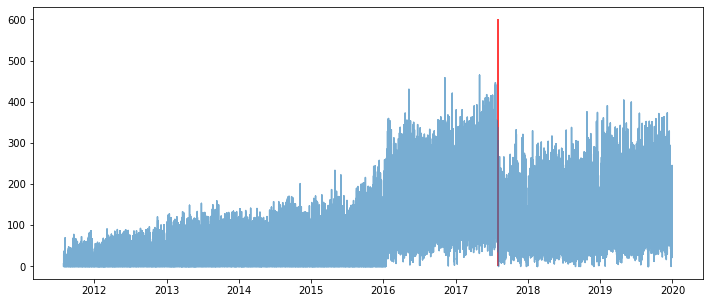

In [5]:
fig = plt.figure(figsize = (12,5))
plt.plot(df["Energy (kWh)"], alpha = 0.6)
plt.vlines(df[df["Fee (USD)"] != 0].index[0], 0, 600, color = "red")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

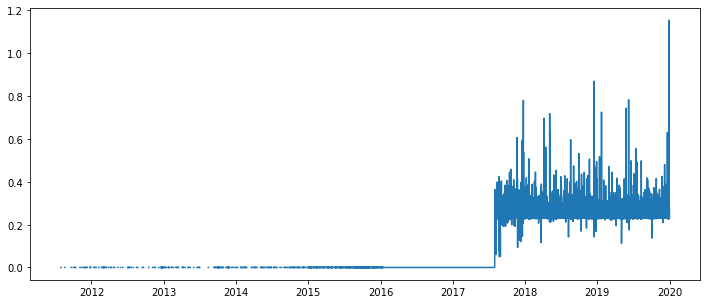

In [6]:
fig = plt.figure(figsize = (12,5))
plt.plot(df["Fee (USD)"]/df["Energy (kWh)"])
plt.show()

In [145]:
df["Fee (USD)"][df["Fee (USD)"] != 0].describe()

count    6179.000000
mean       38.020785
std        24.601901
min         0.940000
25%        19.985000
50%        32.100000
75%        51.526351
max       168.861435
Name: Fee (USD), dtype: float64

In [146]:
np.corrcoef(df["Energy (kWh)"],df["Plugs"])

<IPython.core.display.Javascript object>

array([[1.        , 0.76817393],
       [0.76817393, 1.        ]])

In [147]:
df.columns

Index(['Label', 'Energy (kWh)', 'Fee (USD)', '# Professional & Other Places',
       '# Food', '# Shop & Service', '# Travel & Transport',
       '# Outdoors & Recreation', '# Arts & Entertainment', '# Nightlife Spot',
       '# Residence', '# College & University', '# Event', 'Plugs', 'Label_0',
       'Label_1', 'Label_2', 'Label_3', 'Label_4', 'Label_5', 'Label_6',
       'Month_Day_1', 'Month_Day_2', 'Month_Day_3', 'Month_Day_4',
       'Month_Day_5', 'Month_Day_6', 'Month_Day_7', 'Month_Day_8',
       'Month_Day_9', 'Month_Day_10', 'Month_Day_11', 'Month_Day_12',
       'Month_Day_13', 'Month_Day_14', 'Month_Day_15', 'Month_Day_16',
       'Month_Day_17', 'Month_Day_18', 'Month_Day_19', 'Month_Day_20',
       'Month_Day_21', 'Month_Day_22', 'Month_Day_23', 'Month_Day_24',
       'Month_Day_25', 'Month_Day_26', 'Month_Day_27', 'Month_Day_28',
       'Month_Day_29', 'Month_Day_30', 'Month_Day_31', 'Week_Day_0',
       'Week_Day_1', 'Week_Day_2', 'Week_Day_3', 'Week_Day_4', 'Week_Day

In [4]:
cols_to_standardize = ['# Professional & Other Places', '# Food', '# Shop & Service',
       '# Travel & Transport', '# Outdoors & Recreation',
       '# Arts & Entertainment', '# Nightlife Spot', '# Residence',
       '# College & University', '# Event']

sc = StandardScaler()
stand_poi = sc.fit_transform(df[cols_to_standardize])
stand_poi = pd.DataFrame(stand_poi, index=df.index, columns=cols_to_standardize)
for i in cols_to_standardize:
    df[i] = stand_poi[i]

<IPython.core.display.Javascript object>

In [5]:
def standardize(v):
    return (v - v.mean())/v.std()

In [6]:

df["Energy (kWh)"] = standardize(df["Energy (kWh)"])

In [162]:
corr = df.drop(columns = ['Month_Day_1', 'Month_Day_2', 'Month_Day_3', 'Month_Day_4',
       'Month_Day_5', 'Month_Day_6', 'Month_Day_7', 'Month_Day_8',
       'Month_Day_9', 'Month_Day_10', 'Month_Day_11', 'Month_Day_12',
       'Month_Day_13', 'Month_Day_14', 'Month_Day_15', 'Month_Day_16',
       'Month_Day_17', 'Month_Day_18', 'Month_Day_19', 'Month_Day_20',
       'Month_Day_21', 'Month_Day_22', 'Month_Day_23', 'Month_Day_24',
       'Month_Day_25', 'Month_Day_26', 'Month_Day_27', 'Month_Day_28',
       'Month_Day_29', 'Month_Day_30', 'Month_Day_31', 'Week_Day_0',
       'Week_Day_1', 'Week_Day_2', 'Week_Day_3', 'Week_Day_4', 'Week_Day_5',
       'Week_Day_6', 'Year_Month_1', 'Year_Month_2', 'Year_Month_3',
       'Year_Month_4', 'Year_Month_5', 'Year_Month_6', 'Year_Month_7',
       'Year_Month_8', 'Year_Month_9', 'Year_Month_10', 'Year_Month_11',
       'Year_Month_12',]).corr()

In [152]:
df["Fee (bool)"] = 1 * (df["Fee (USD)"] > 0)

<AxesSubplot:xlabel='Date'>

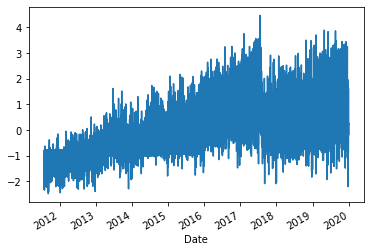

In [153]:
df["Energy (kWh)"].plot()

In [159]:
df = df.fillna(0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

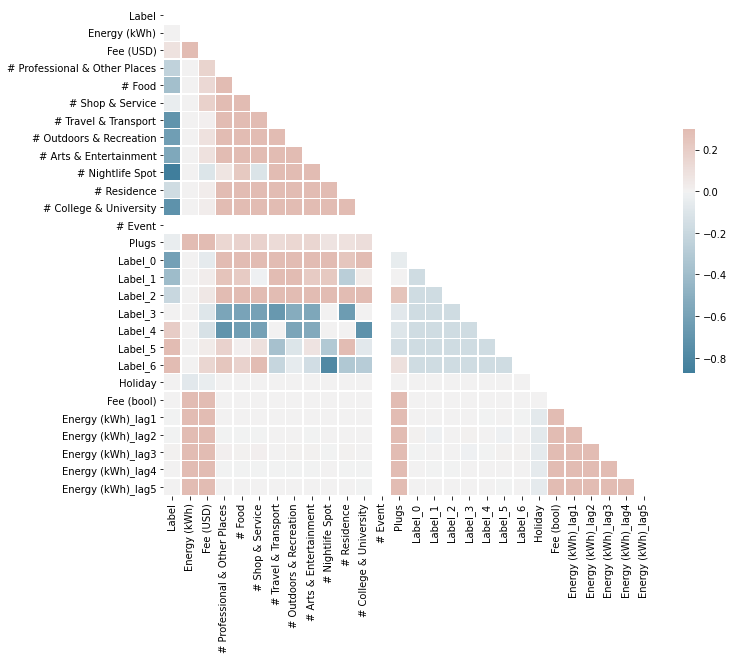

In [163]:

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [7]:
l = lags()

In [8]:
df = df.sort_index()

In [9]:
df = df.fillna(0)

In [10]:
df0 = df[df.Label == 0]

In [11]:
df0 = l.buildLaggedFeatures(df0, ["Energy (kWh)"])

In [12]:
df0

,Label,Energy (kWh),Fee (USD),# Professional & Other Places,# Food,# Shop & Service,# Travel & Transport,# Outdoors & Recreation,# Arts & Entertainment,# Nightlife Spot,...,Year_Month_8,Year_Month_9,Year_Month_10,Year_Month_11,Year_Month_12,Energy (kWh)_lag1,Energy (kWh)_lag2,Energy (kWh)_lag3,Energy (kWh)_lag4,Energy (kWh)_lag5
Date,,,,,,,,,,,,,,,,,,,,,
2011-08-03,0,-0.682926,0.000000,0.788739,1.079697,0.611358,1.314389,1.534936,1.237596,0.898096,...,1,0,0,0,0,-0.815128,-0.953544,-0.554897,-0.656895,-0.938571
2011-08-04,0,-0.647504,0.000000,0.788739,1.079697,0.611358,1.314389,1.534936,1.237596,0.898096,...,1,0,0,0,0,-0.682926,-0.815128,-0.953544,-0.554897,-0.656895
2011-08-05,0,-0.625780,0.000000,0.788739,1.079697,0.611358,1.314389,1.534936,1.237596,0.898096,...,1,0,0,0,0,-0.647504,-0.682926,-0.815128,-0.953544,-0.554897
2011-08-06,0,-0.157525,0.000000,0.788739,1.079697,0.611358,1.314389,1.534936,1.237596,0.898096,...,1,0,0,0,0,-0.625780,-0.647504,-0.682926,-0.815128,-0.953544
2011-08-07,0,-0.849992,0.000000,0.788739,1.079697,0.611358,1.314389,1.534936,1.237596,0.898096,...,1,0,0,0,0,-0.157525,-0.625780,-0.647504,-0.682926,-0.815128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0,0.064984,27.005897,0.788739,1.079697,0.611358,1.314389,1.534936,1.237596,0.898096,...,0,0,0,0,1,-0.012445,-0.889861,-0.038742,0.418190,-0.350258
2019-12-28,0,0.369797,25.484103,0.788739,1.079697,0.611358,1.314389,1.534936,1.237596,0.898096,...,0,0,0,0,1,0.064984,-0.012445,-0.889861,-0.038742,0.418190
2019-12-29,0,-0.278913,13.670000,0.788739,1.079697,0.611358,1.314389,1.534936,1.237596,0.898096,...,0,0,0,0,1,0.369797,0.064984,-0.012445,-0.889861,-0.038742


In [13]:
X_train, X_test, y_train, y_test = train_test_split(df0.drop(columns=["Energy (kWh)"]), df0["Energy (kWh)"], shuffle=False)

In [14]:
regressor = LinearRegression().fit(X_train, y_train)

In [15]:
y_pred = regressor.predict(X_test)

In [16]:
r2_score(y_test, y_pred)

0.2945100201678581

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

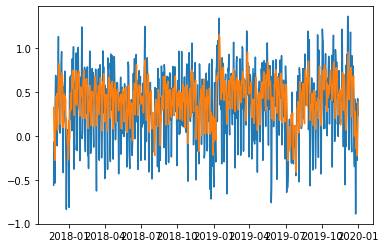

In [17]:
plt.plot(y_test.index,y_test)
plt.plot(y_test.index,y_pred)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

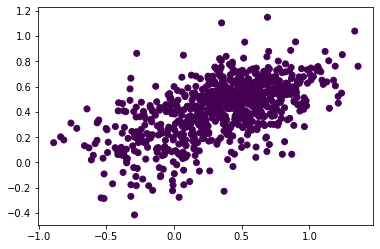

In [18]:
plt.scatter(y_test,y_pred, c = X_test.Label)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

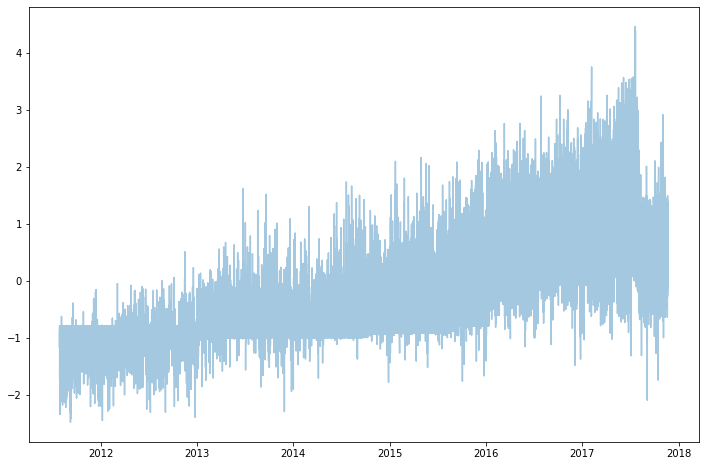

In [173]:
fig = plt.figure(figsize = (12,8))
plt.plot(y_train.index, y_train, alpha = 0.4)
plt.show()

In [68]:
np.sqrt(mean_squared_error(y_test,y_pred))

<IPython.core.display.Javascript object>

83.45833713901689

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

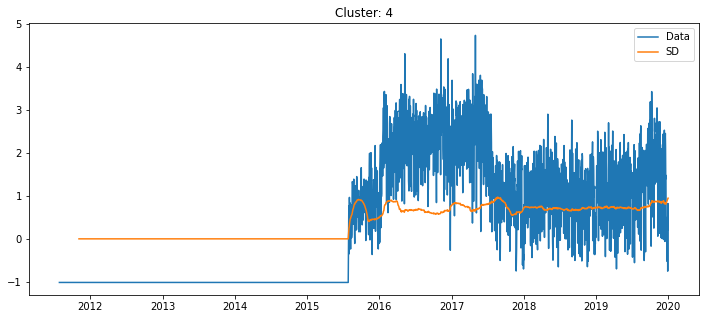

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

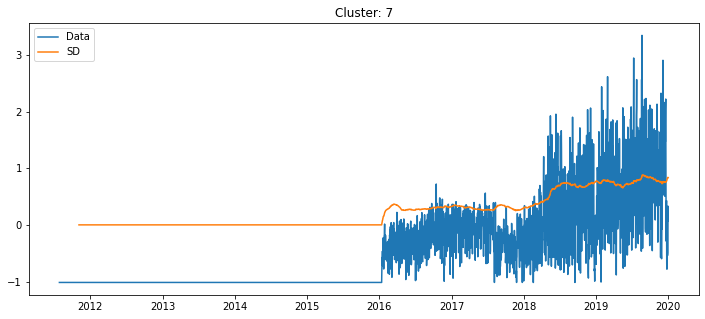

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

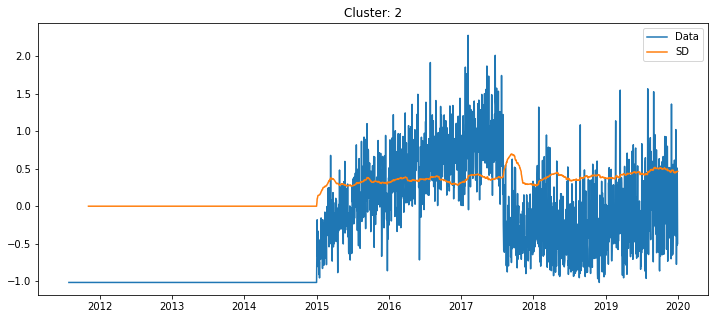

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

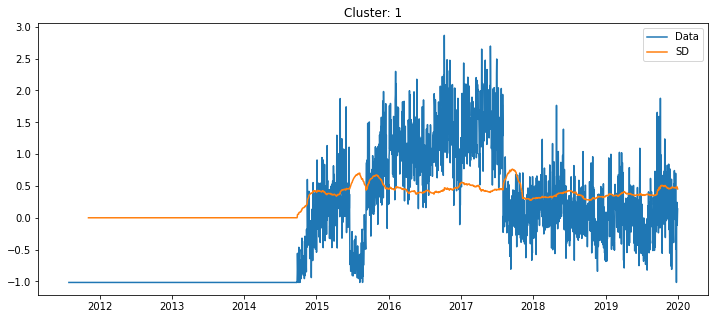

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

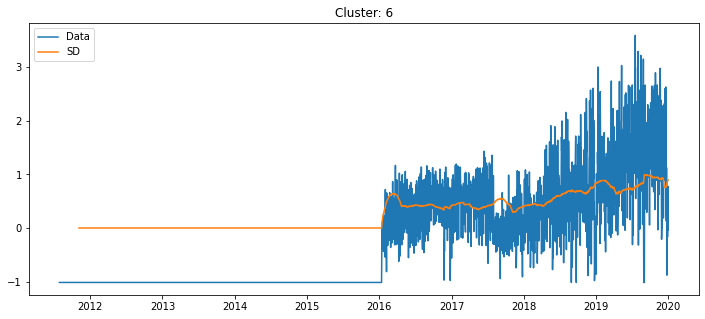

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

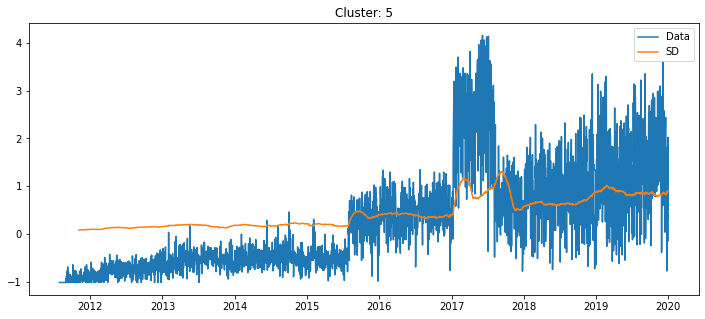

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

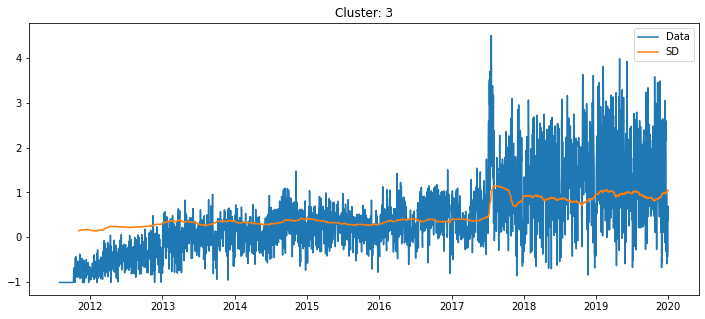

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

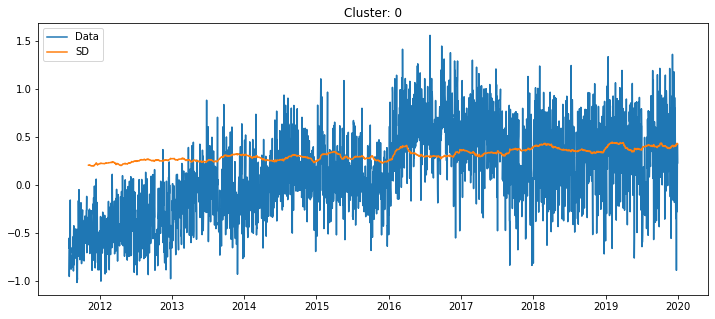

In [18]:
for i in df.Label.unique():
    fig = plt.figure(figsize = (12, 5))
    ts = df["Energy (kWh)"][df.Label == i]
    rolling_std = ts.rolling(window = 100).std()
    plt.plot(ts, label = "Data")
    plt.plot(rolling_std, label = "SD")
    plt.legend()
    plt.title(f"Cluster: {i}")
    plt.show()
    



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

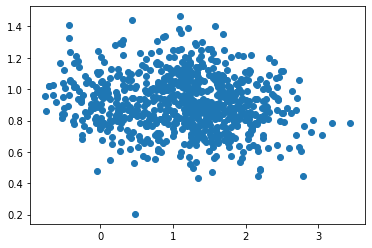

------------------------------
Label: 4
-0.18900852769262588


<IPython.core.display.Javascript object>

0.8498183355897804
------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

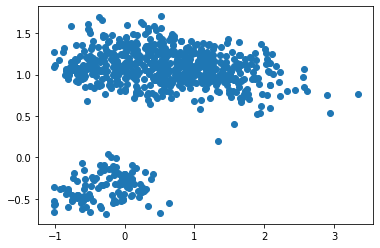

------------------------------
Label: 7
-0.3372054597225924


<IPython.core.display.Javascript object>

0.9354122679375223
------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

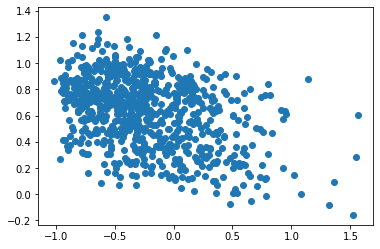

------------------------------
Label: 2
-4.322439398978557


<IPython.core.display.Javascript object>

1.0410319156238494
------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

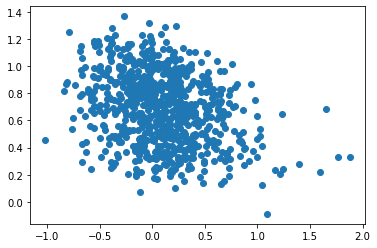

------------------------------
Label: 1
-3.2171636834137756


<IPython.core.display.Javascript object>

0.8117361472807517
------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

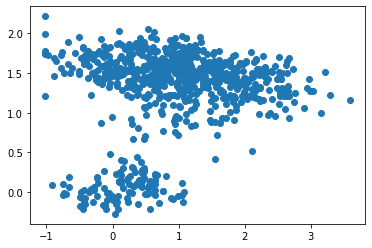

------------------------------
Label: 6
-0.2934761702395019


<IPython.core.display.Javascript object>

0.9916989308429149
------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

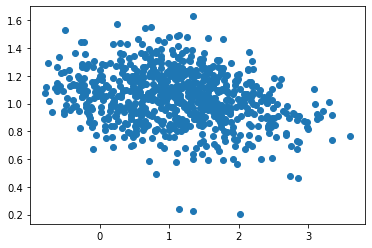

------------------------------
Label: 5
-0.17323148968808577


<IPython.core.display.Javascript object>

0.9074636642190305
------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

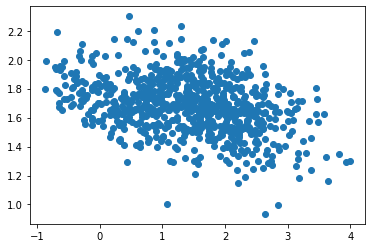

------------------------------
Label: 3
-0.2761485141917974


<IPython.core.display.Javascript object>

1.0631608738019052
------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

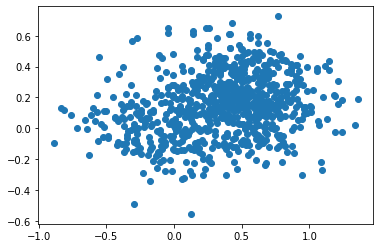

------------------------------
Label: 0
-0.27398928813519685


<IPython.core.display.Javascript object>

0.4483435681324864
------------------------------


In [27]:
for i in df.Label.unique():
    x_tr, y_tr = X_train[X_train.Label == i][y_train[X_train.Label == i] != 0], y_train[X_train.Label == i][y_train[X_train.Label == i] != 0]
    x_te, y_te = X_test[X_test.Label == i][y_test[X_test.Label == i] != 0], y_test[X_test.Label == i][y_test[X_test.Label == i] != 0]
    reg = LinearRegression().fit(x_tr,y_tr)
    y_pred = regressor.predict(x_te)
    plt.scatter(y_te,y_pred)
    plt.show()
    print("-"*30)
    print(f'Label: {i}')
    print(r2_score(y_test[X_test.Label == i], y_pred))
    print(np.sqrt(mean_squared_error(y_test[X_test.Label == i], y_pred)))
    print("-"*30)
